**Overview**
> **`Ticker:`**
Mã chứng khoán đại diện cho một công ty trên thị trường chứng khoán. Ví dụ: "FPT" là mã của Tập đoàn FPT.

> **`Date/Time:`**
Thời điểm diễn ra giao dịch, bao gồm ngày và giờ (giờ phút cụ thể).
Ví dụ: "12/25/2018 9:15" có nghĩa là giao dịch diễn ra vào lúc 9 giờ 15 phút ngày 25 tháng 12 năm 2018.

> **`Open:`**
Giá mở cửa trong khoảng thời gian được ghi nhận, tức là giá đầu tiên của cổ phiếu trong khung thời gian đó.
Ví dụ: Giá mở cửa tại 9:15 là 30.89.

> **`High:`**
Giá cao nhất của cổ phiếu trong khoảng thời gian được ghi nhận.
Ví dụ: Tại 9:16, giá cao nhất là 30.81.

> **`Low:`**
Giá thấp nhất của cổ phiếu trong khoảng thời gian được ghi nhận.
Ví dụ: Tại 9:21, giá thấp nhất là 30.59.

> **`Close`**:
Giá đóng cửa trong khoảng thời gian được ghi nhận, tức là giá cuối cùng của cổ phiếu trong khung thời gian đó.
Ví dụ: Giá đóng cửa tại 9:15 là 30.89.

> **`Volume:`**
Số lượng cổ phiếu được giao dịch trong khoảng thời gian đó.
Ví dụ: Tại 9:18, khối lượng giao dịch là 2120 cổ phiếu.

> **`Open Interest:`**
Số lượng hợp đồng phái sinh chưa được tất toán (dành cho giao dịch hợp đồng tương lai hoặc quyền chọn).
Trong trường hợp này, tất cả giá trị "Open Interest" đều bằng 0, có thể do dữ liệu bạn cung cấp chỉ liên quan đến cổ phiếu cơ bản chứ không phải các sản phẩm phái sinh.


### **`Load and check info dataset`**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_fpt = pd.read_csv('/content/drive/MyDrive/test/FPT.csv')
df_fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [ ]:
df_fpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


In [ ]:
df_fpt.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [ ]:
df_fpt.isnull().sum()

,0
Ticker,0
Date/Time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Open Interest,0


In [ ]:
df_fpt.columns

Index(['Ticker', 'Date/Time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Open Interest'],
      dtype='object')

In [ ]:
# df_fpt['Date/Time'] = pd.to_datetime(df_fpt['Date/Time'])
# df_fpt = df_fpt.drop(columns=['Open Interest'])
# df_fpt.head()

### **`EDA and Features Enginerring`**

In [ ]:
df_fpt.index = pd.to_datetime(df_fpt['Date/Time'], format='%m/%d/%Y %H:%M')

In [ ]:

# # Tính khoảng cách thời gian giữa các dòng liên tiếp
# df_fpt['Time_Diff'] = df_fpt['Date/Time'].diff().dt.total_seconds() / 60  # chuyển sang phút

# # Kiểm tra các giá trị không bằng 1 phút
# non_continuous = df_fpt[df_fpt['Time_Diff'] != 1]

# # Hiển thị các dòng không liên tục và thông tin thống kê
# print("Số lượng khoảng thời gian không liên tục:", len(non_continuous))



In [ ]:
df_fpt.shape

(97406, 8)

In [ ]:
# Tạo bản sao để merge
df_fpt_shifted = df_fpt[["Date/Time", "Close"]].copy()

num_minutes_to_shift = [1,3,5]

for minutes in num_minutes_to_shift:
  df_fpt[f"Price After {minutes} minutes"] = pd.merge_asof(
      df_fpt, df_fpt_shifted,
      left_on=df_fpt.index + pd.Timedelta(minutes=minutes),  # Use index + n minutes
      right_index=True,
      direction="backward"
  )["Close_y"]
  df_fpt[f"Price Fluctuations {minutes} minutes"] = df_fpt[f"Price After {minutes} minutes"] - df_fpt["Close"]

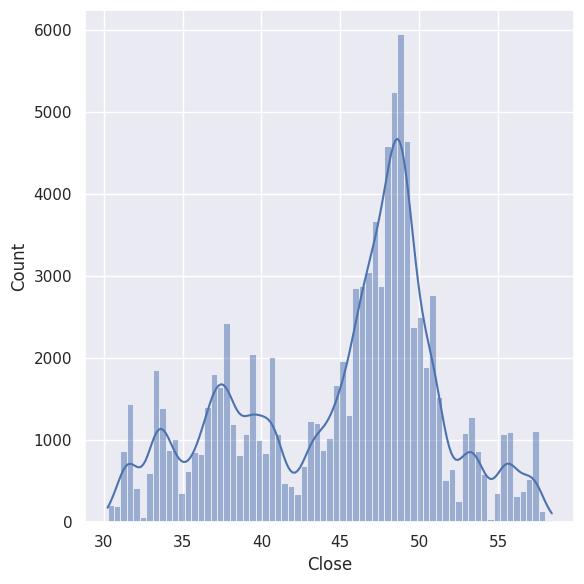

In [ ]:
fig, ax = plt.subplots( figsize=(6, 6))

# Plotting each histogram on respective axes
sns.histplot(data=df_fpt, x='Close', kde=True)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


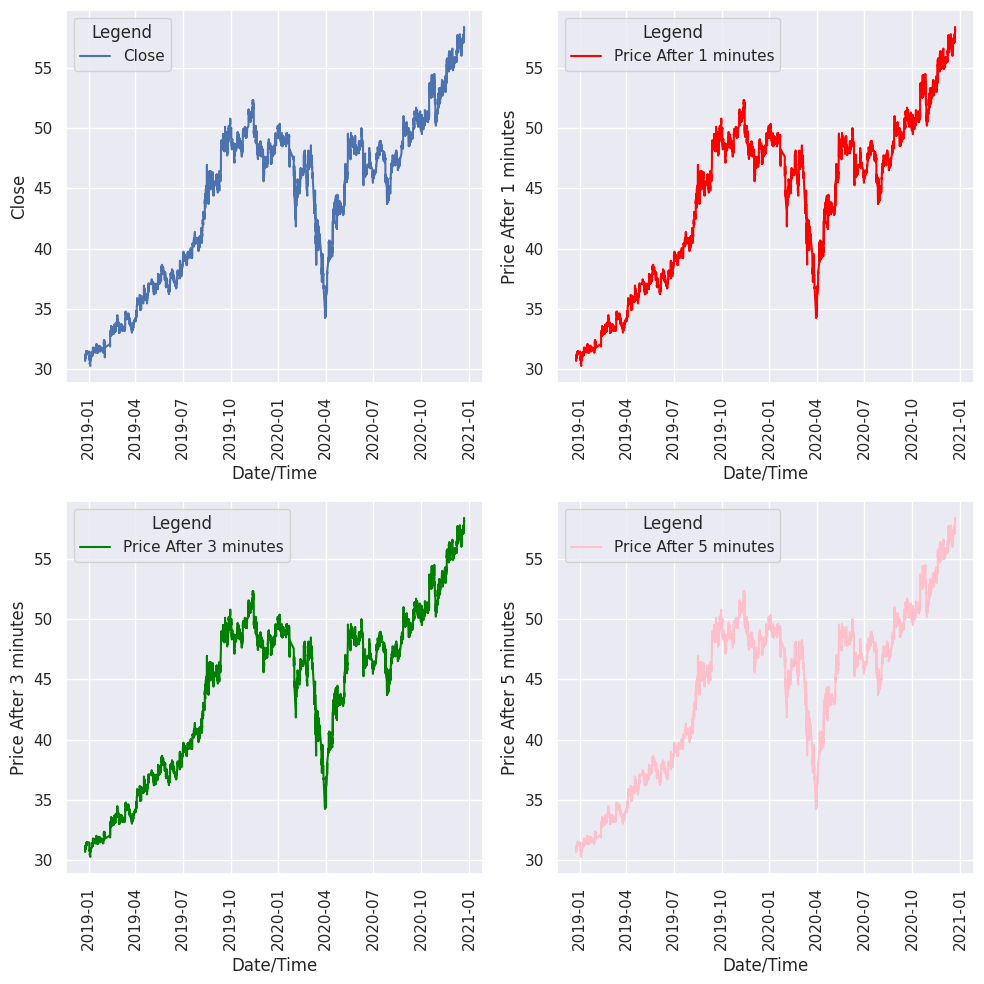

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10, 10))

# Vẽ biểu đồ đường với độ trong suốt alpha
sns.lineplot(data=df_fpt, x=df_fpt.index, y='Close', label='Close', alpha=1, ax=ax[0,0])
sns.lineplot(data=df_fpt, x=df_fpt.index, y='Price After 1 minutes', label='Price After 1 minutes',color='red', ax=ax[0,1])
sns.lineplot(data=df_fpt, x=df_fpt.index, y='Price After 3 minutes', label='Price After 3 minutes',color='green', ax=ax[1,0])
sns.lineplot(data=df_fpt, x=df_fpt.index, y='Price After 5 minutes', label='Price After 5 minutes',color='pink', ax=ax[1,1])


# Hiển thị chú thích (legend) cho từng axes
ax[0, 0].legend(title='Legend', loc='upper left')
ax[0, 1].legend(title='Legend', loc='upper left')
ax[1, 0].legend(title='Legend', loc='upper left')
ax[1, 1].legend(title='Legend', loc='upper left')
for ax_i in ax.flatten():  # Lặp qua tất cả các axes trong mảng 2x2
    ax_i.tick_params(axis='x', rotation=90)
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [ ]:
df_fpt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97406 entries, 2018-12-25 09:15:00 to 2020-12-22 14:46:00
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker                        97406 non-null  object 
 1   Date/Time                     97406 non-null  object 
 2   Open                          97406 non-null  float64
 3   High                          97406 non-null  float64
 4   Low                           97406 non-null  float64
 5   Close                         97406 non-null  float64
 6   Volume                        97406 non-null  int64  
 7   Open Interest                 97406 non-null  int64  
 8   Price After 1 minutes         97406 non-null  float64
 9   Price Fluctuations 1 minutes  97406 non-null  float64
 10  Price After 3 minutes         97406 non-null  float64
 11  Price Fluctuations 3 minutes  97406 non-null  float64
 12  Price After 5 minutes    

### **`Preprocessing and model training`**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Chọn các cột cần thiết
features = ['Close']
target = ['Price After 1 minutes','Price After 3 minutes','Price After 5 minutes']

df_new = df_fpt[features + target]

# Chia dữ liệu thành train, validation, test
train_size = int(len(df_new) * 0.7)
valid_size = int(len(df_new) * 0.15)

df_new_train = df_new.iloc[:train_size]
df_new_valid = df_new.iloc[train_size:train_size + valid_size]
df_new_test = df_new.iloc[train_size + valid_size:]


In [ ]:
df_new_train.shape

(68184, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo scaler
scaler = StandardScaler()

# Áp dụng scaler cho các features của tập train
scaler_features = scaler.fit(df_new_train[features])  # Chỉ fit trên tập train


train_scaled = scaler_features.transform(df_new_train[features])
valid_scaled = scaler_features.transform(df_new_valid[features])
test_scaled = scaler_features.transform(df_new_test[features])

y_train1 = df_new_train[target].values
y_valid1 = df_new_valid[target].values
y_test1 = df_new_test[target].values

In [ ]:
print(y_train1.shape)
print(df_new_train[target].shape)
print(train_scaled.shape)

(68184, 3)
(68184, 3)
(68184, 1)


In [ ]:

# Tạo chuỗi thời gian
def create_sequences(data, target, time_steps):
    X, y = [], []
    for i in range(len(data)) :
        X.append(data[i:i + time_steps, :])
        y.append(target[i])
    return np.array(X), np.array(y)

time_steps = 1
X_train, y_train = create_sequences(train_scaled, y_train1, time_steps)
X_valid, y_valid = create_sequences(valid_scaled, y_valid1, time_steps)
X_test, y_test = create_sequences(test_scaled, y_test1, time_steps)

# Kiểm tra kích thước đầu ra
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)

X_train shape: (68184, 1, 1)
X_valid shape: (14610, 1, 1)
X_test shape: (14612, 1, 1)


In [ ]:
y_train

array([[30.81, 30.74, 30.74],
       [30.74, 30.74, 30.66],
       [30.74, 30.74, 30.66],
       ...,
       [48.6 , 48.55, 48.55],
       [48.6 , 48.5 , 48.5 ],
       [48.55, 48.55, 48.55]])

In [ ]:
X_train.shape[2]

1

#### LSTM

In [ ]:

# Xây dựng mô hình LSTM tối ưu hơn
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(3, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Huấn luyện mô hình
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,891 (116.76 KB)

 Trainable params: 29,891 (116.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 445.6505 - mae: 13.7522 - val_loss: 0.3958 - val_mae: 0.4607
Epoch 2/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - loss: 22.8539 - mae: 3.7892 - val_loss: 0.1640 - val_mae: 0.3153
Epoch 3/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 16.5967 - mae: 3.2055 - val_loss: 0.1242 - val_mae: 0.2568
Epoch 4/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 7.1869 - mae: 2.0520 - val_loss: 0.0602 - val_mae: 0.1897
Epoch 5/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 1.4845 - mae: 0.8950 - val_loss: 0.0080 - val_mae: 0.0649
Epoch 6/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6152 - mae: 0.5976 - val_loss: 0.0131 - val_mae: 0.0956
Epoch 7/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.4422 - mae: 0.5063 - val_loss: 0.0186 - val_mae: 0.1093
Epoch 8/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3528 - mae: 0.4514 - val_loss: 0.0129 - val_mae: 0.0774
Epoch 9/10
2131/2131 ━━━━━━

### **`Validation`**

#### LSTM

##### Trên tập valid

In [ ]:
# Đánh giá mô hình
loss, mae = model.evaluate(X_valid, y_valid)
print("Test Loss:", loss)
print("Test MAE:", mae)

# Dự đoán trên tập test
y_pred = model.predict(X_valid)

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0073 - mae: 0.0595
Test Loss: 0.007991931401193142
Test MAE: 0.0648903176188469
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
# Tính R2 cho từng cột (1, 3, 5 phút)
r2_1min = r2_score(y_valid[:, 0], y_pred[:, 0])
r2_3min = r2_score(y_valid[:, 1], y_pred[:, 1])
r2_5min = r2_score(y_valid[:, 2], y_pred[:, 2])

# In kết quả
print(f"R2 score for 1 minute prediction: {r2_1min}")
print(f"R2 score for 3 minute prediction: {r2_3min}")
print(f"R2 score for 5 minute prediction: {r2_5min}")

R2 score for 1 minute prediction: 0.9976642826445592
R2 score for 3 minute prediction: 0.9965346910597307
R2 score for 5 minute prediction: 0.9945559058035814


In [ ]:
y_valid

array([[48.5 , 48.5 , 48.55],
       [48.55, 48.55, 48.55],
       [48.5 , 48.55, 48.6 ],
       ...,
       [50.2 , 50.1 , 50.1 ],
       [50.2 , 50.1 , 50.1 ],
       [50.1 , 50.1 , 50.  ]])

In [ ]:
y_pred

array([[48.518204, 48.525547, 48.50487 ],
       [48.469276, 48.476276, 48.45631 ],
       [48.518204, 48.525547, 48.50487 ],
       ...,
       [50.07846 , 50.097706, 50.051582],
       [50.07846 , 50.097706, 50.051582],
       [50.07846 , 50.097706, 50.051582]], dtype=float32)

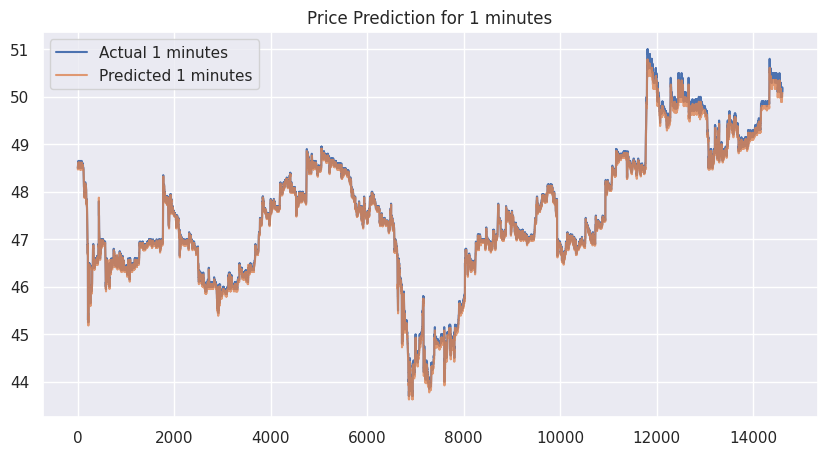

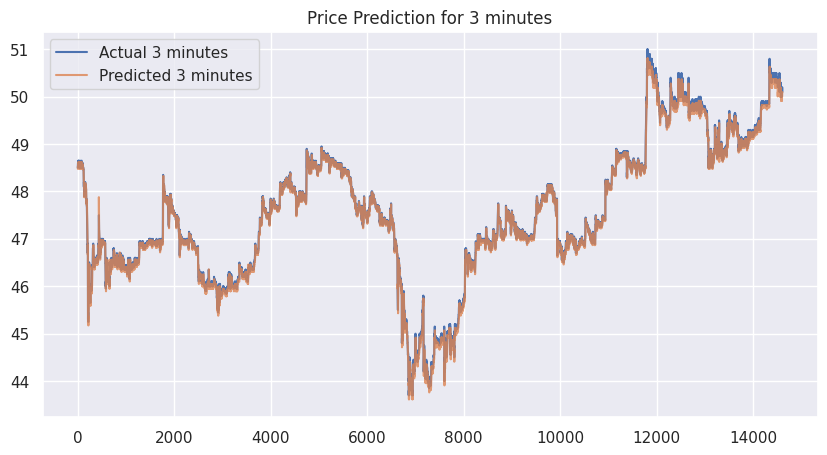

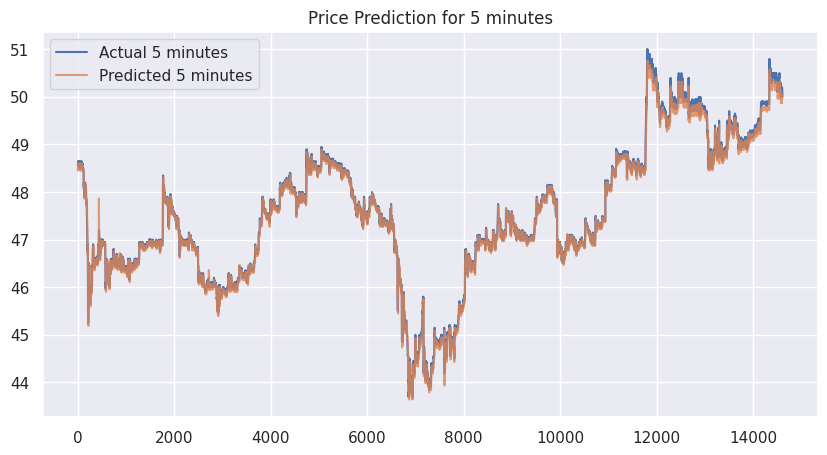

In [ ]:
# So sánh giá trị thực tế và dự đoán
for i, minutes in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(y_valid[:, i], label=f"Actual {minutes} minutes")
    plt.plot(y_pred[:, i], label=f"Predicted {minutes} minutes",alpha = 0.8)
    plt.legend()
    plt.title(f"Price Prediction for {minutes} minutes")
    plt.show()


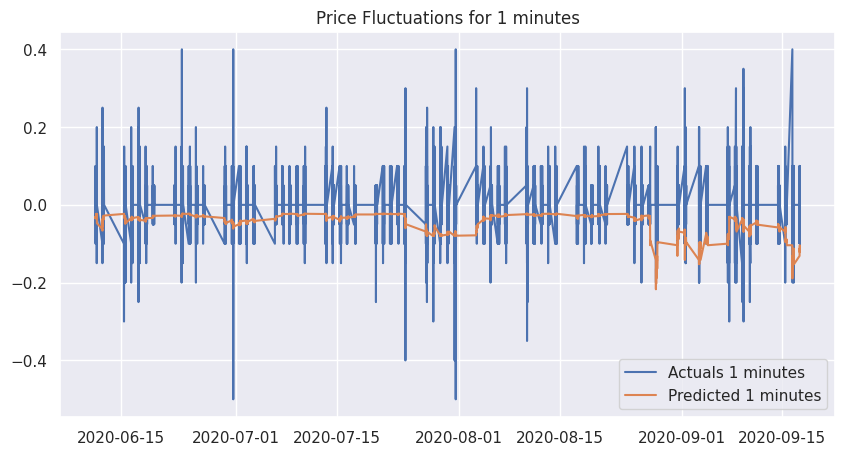

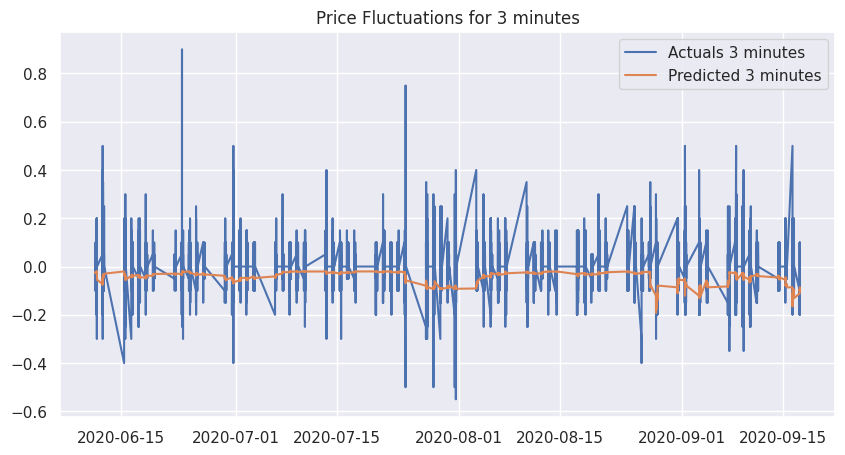

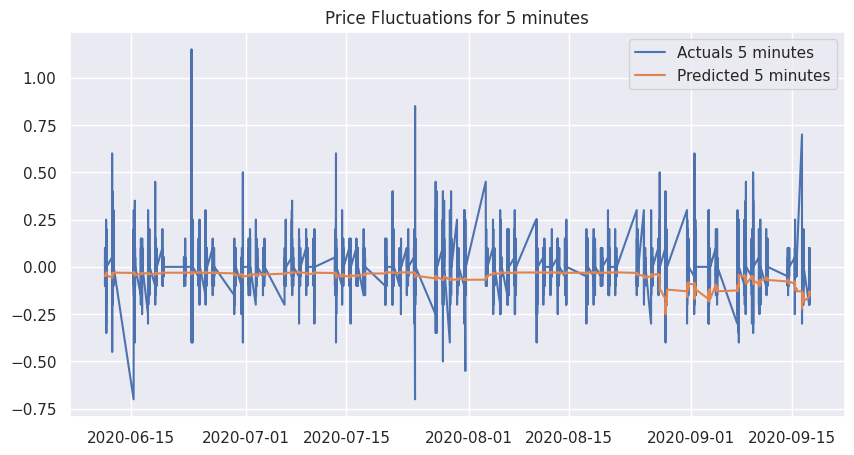

In [ ]:
for i, minutes in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(df_fpt[f"Price Fluctuations {minutes} minutes"].iloc[train_size:train_size+valid_size] , label=f"Actuals {minutes} minutes")
    plt.plot(y_pred[:,i] - df_fpt['Close'].iloc[train_size:train_size+valid_size]  , label=f"Predicted {minutes} minutes")
    plt.legend()
    plt.title(f"Price Fluctuations for {minutes} minutes")
    plt.show()

Dự đoán trong 1 phút
- Dự đoán xu hướng tăng giảm đúng:  2945
- Dự đoán sai xu hướng:  11665


<Figure size 1000x500 with 0 Axes>

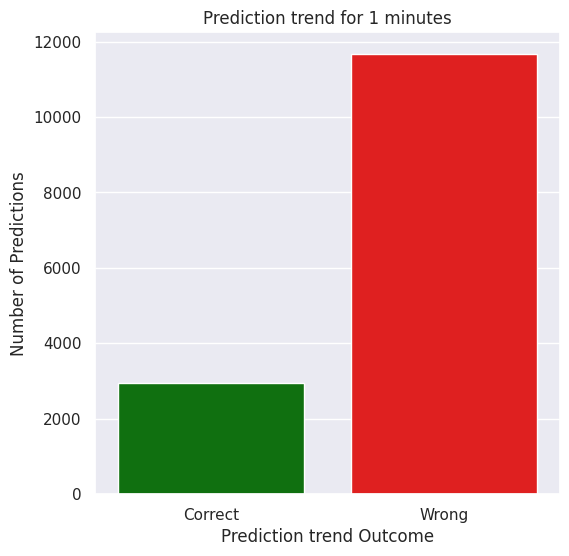

------------------------------
Dự đoán trong 3 phút
- Dự đoán xu hướng tăng giảm đúng:  4154
- Dự đoán sai xu hướng:  10456


<Figure size 1000x500 with 0 Axes>

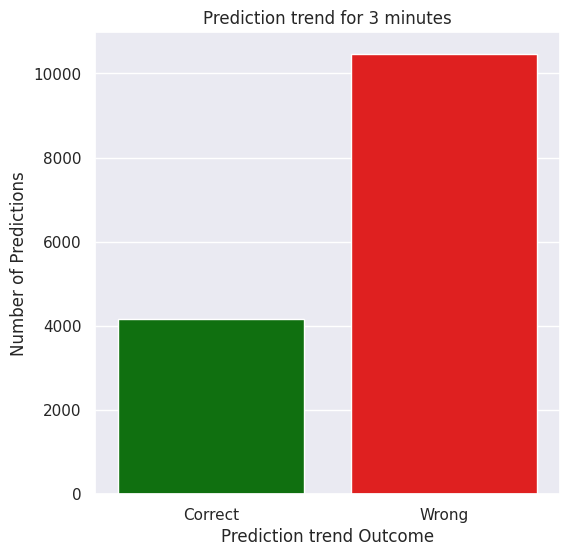

------------------------------
Dự đoán trong 5 phút
- Dự đoán xu hướng tăng giảm đúng:  4662
- Dự đoán sai xu hướng:  9948


<Figure size 1000x500 with 0 Axes>

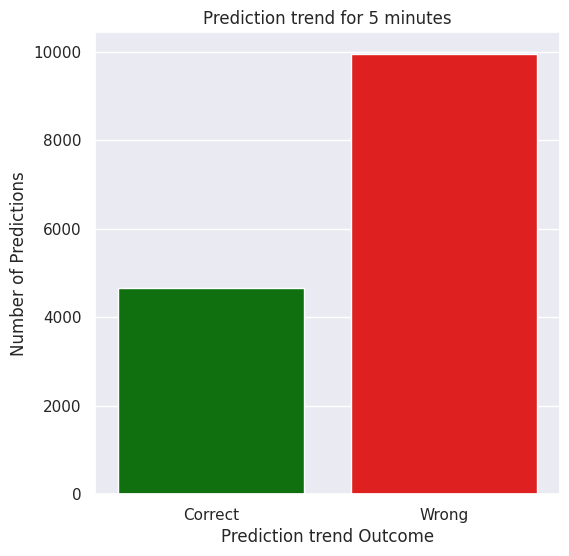

------------------------------


In [ ]:
for i, minutes in enumerate([1, 3, 5]):
  plt.figure(figsize=(10, 5))
  t = y_pred[:,i] - df_fpt['Close'].iloc[train_size:train_size+valid_size]
  t1 = df_fpt[f"Price Fluctuations {minutes} minutes"].iloc[train_size:train_size+valid_size]

  pred_correct = 0
  pred_wrong = 0

  # Iterate through both series simultaneously using zip
  for x, y in zip(t1, t):
    if((x > 0 and y > 0) or (x < 0 and y < 0) or (x == 0 and y == 0) ):
      pred_correct += 1
    else:
      pred_wrong += 1
  print(f"Dự đoán trong {minutes} phút")
  print("- Dự đoán xu hướng tăng giảm đúng: ", pred_correct)
  print("- Dự đoán sai xu hướng: ",pred_wrong)

  # Create DataFrame for seaborn
  data = {'Outcome': ['Correct', 'Wrong'], 'Count': [pred_correct, pred_wrong]}
  df = pd.DataFrame(data)

  fig, ax = plt.subplots(figsize=(6, 6))  # Create figure and axes
  sns.barplot(x='Outcome', y='Count', hue='Outcome', data=df, palette=['green', 'red'], legend=False, dodge=False, ax=ax)
  ax.set_title(f"Prediction trend for {minutes} minutes")  # Set title using ax
  ax.set_ylabel("Number of Predictions")  # Set ylabel using ax
  ax.set_xlabel("Prediction trend Outcome")  # Set xlabel using ax
  plt.show()
  print("-"*30)


##### Trên tập Test

In [ ]:
# Đánh giá mô hình
loss, mae = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
# Tính R2 cho từng cột (1, 3, 5 phút)
r2_1min = r2_score(y_test[:, 0], y_pred[:, 0])
r2_3min = r2_score(y_test[:, 1], y_pred[:, 1])
r2_5min = r2_score(y_test[:, 2], y_pred[:, 2])

# In kết quả
print(f"R2 score for 1 minute prediction: {r2_1min}")
print(f"R2 score for 3 minute prediction: {r2_3min}")
print(f"R2 score for 5 minute prediction: {r2_5min}")

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4465 - mae: 0.4466
Test Loss: 1.9353797435760498
Test MAE: 1.0541752576828003
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R2 score for 1 minute prediction: 0.6570553448184959
R2 score for 3 minute prediction: 0.6750833613467413
R2 score for 5 minute prediction: 0.62843919013383


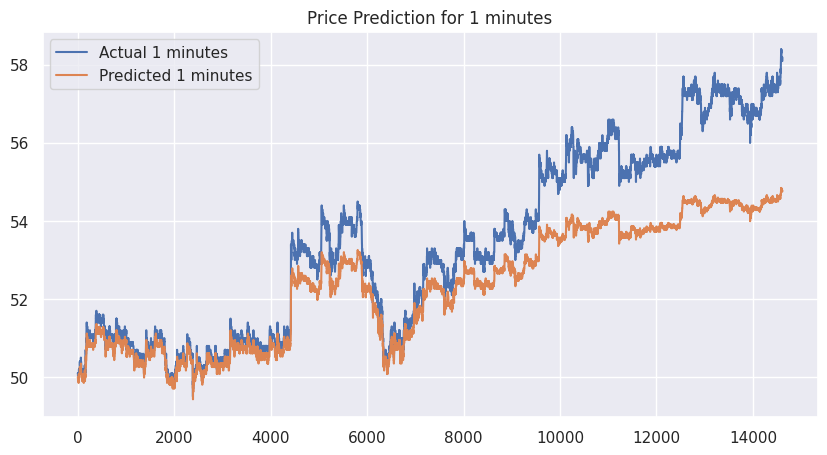

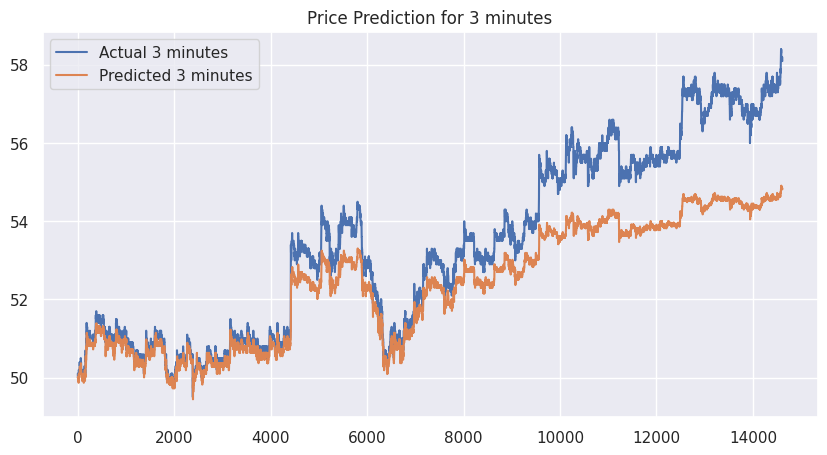

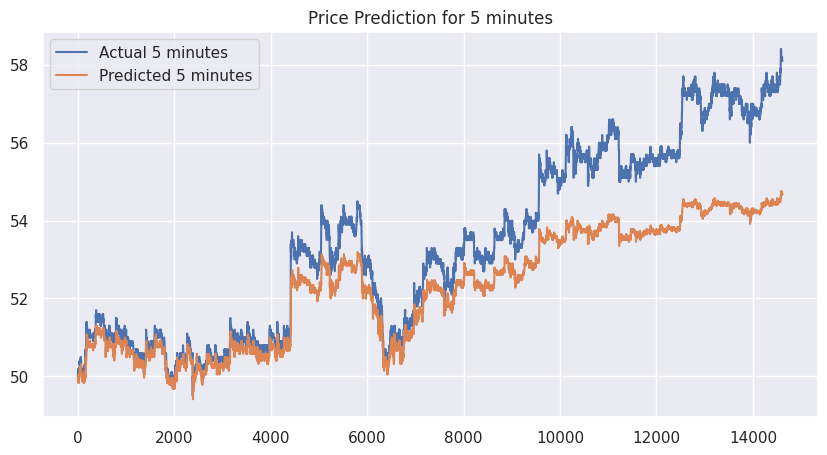

In [ ]:
# So sánh giá trị thực tế và dự đoán
for i, minutes in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:, i], label=f"Actual {minutes} minutes")
    plt.plot(y_pred[:, i], label=f"Predicted {minutes} minutes")
    plt.legend()
    plt.title(f"Price Prediction for {minutes} minutes")
    plt.show()


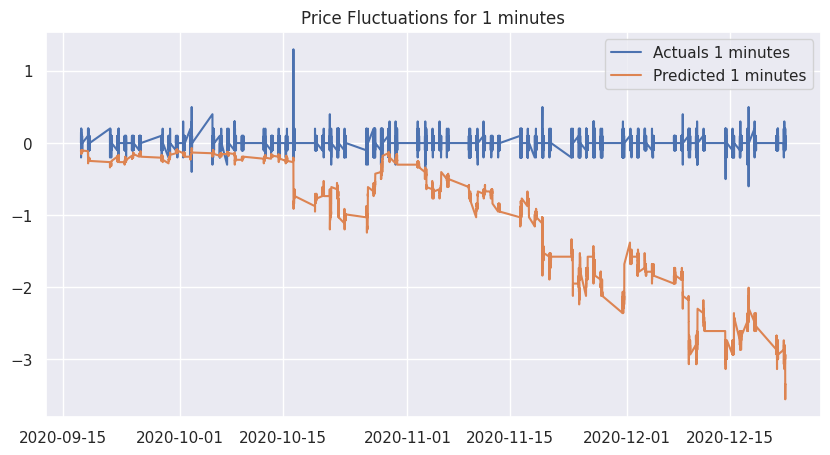

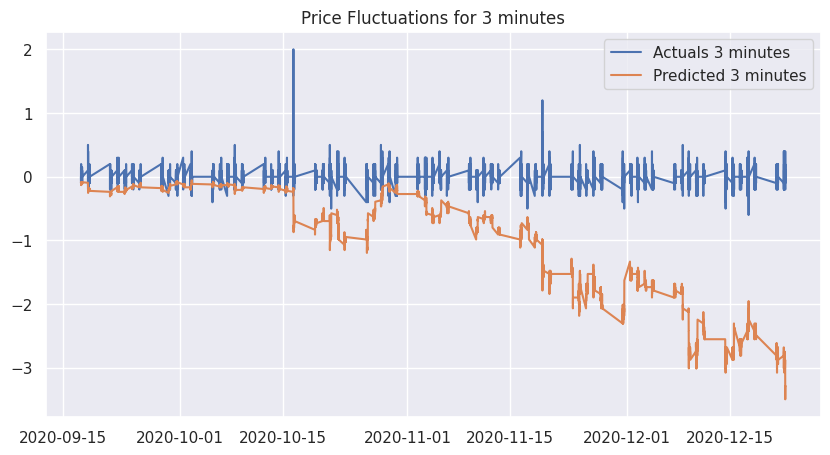

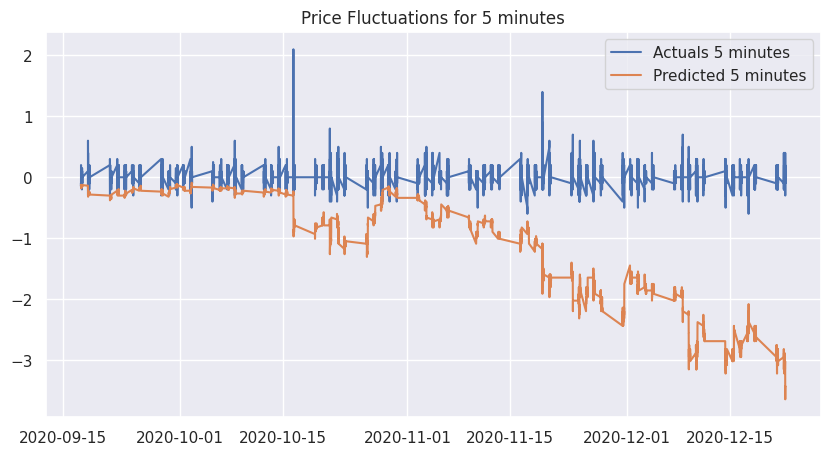

In [ ]:
for i, minutes in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(df_fpt[f"Price Fluctuations {minutes} minutes"].iloc[train_size+valid_size:] , label=f"Actuals {minutes} minutes")
    plt.plot(y_pred[:,i] - df_fpt['Close'].iloc[train_size+valid_size:]  , label=f"Predicted {minutes} minutes")
    plt.legend()
    plt.title(f"Price Fluctuations for {minutes} minutes")
    plt.show()

Dự đoán trong 1 phút
- Dự đoán xu hướng tăng giảm đúng:  2634
- Dự đoán sai xu hướng:  11978


<Figure size 1000x500 with 0 Axes>

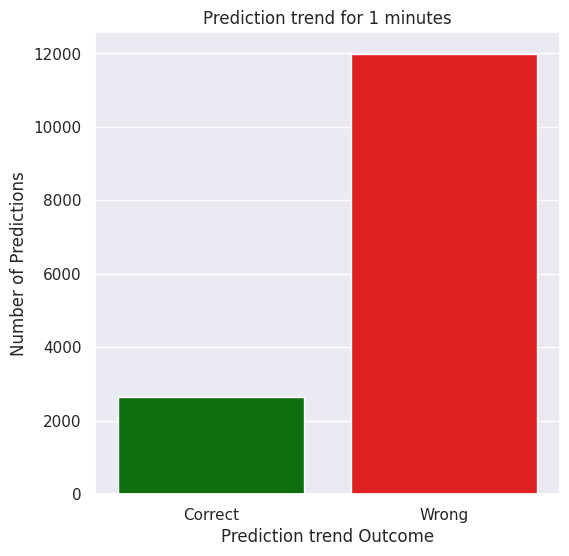

------------------------------
Dự đoán trong 3 phút
- Dự đoán xu hướng tăng giảm đúng:  3726
- Dự đoán sai xu hướng:  10886


<Figure size 1000x500 with 0 Axes>

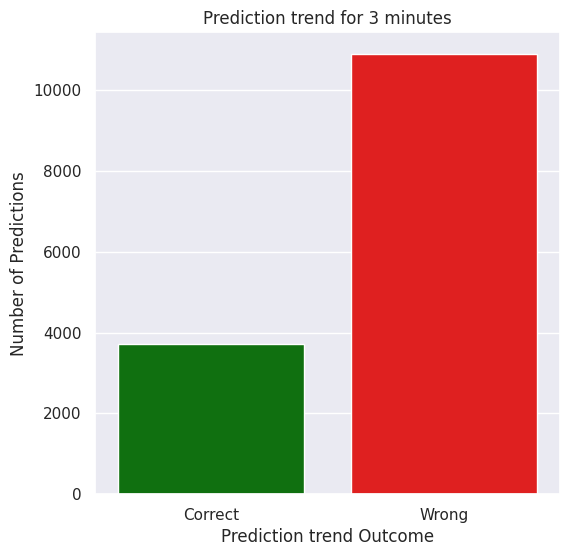

------------------------------
Dự đoán trong 5 phút
- Dự đoán xu hướng tăng giảm đúng:  4251
- Dự đoán sai xu hướng:  10361


<Figure size 1000x500 with 0 Axes>

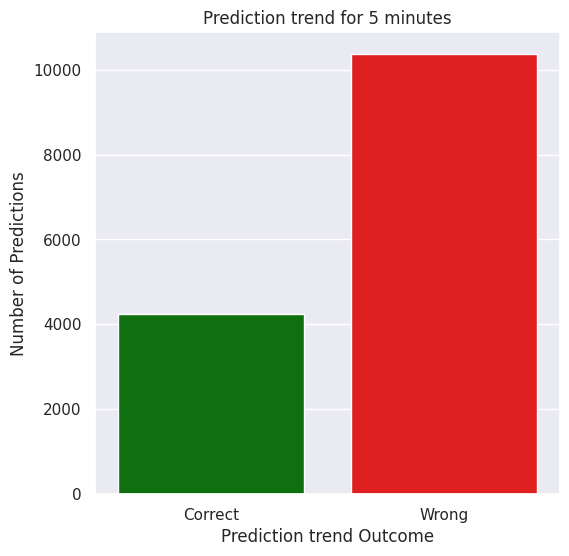

------------------------------


In [ ]:
for i, minutes in enumerate([1, 3, 5]):
  plt.figure(figsize=(10, 5))
  t = y_pred[:,i] - df_fpt['Close'].iloc[train_size+valid_size:]
  t1 = df_fpt[f"Price Fluctuations {minutes} minutes"].iloc[train_size+valid_size:]

  pred_correct = 0
  pred_wrong = 0

  # Iterate through both series simultaneously using zip
  for x, y in zip(t1, t):
    if((x > 0 and y > 0) or (x < 0 and y < 0) or (x == 0 and y == 0) ):
      pred_correct += 1
    else:
      pred_wrong += 1
  print(f"Dự đoán trong {minutes} phút")
  print("- Dự đoán xu hướng tăng giảm đúng: ", pred_correct)
  print("- Dự đoán sai xu hướng: ",pred_wrong)

  # Create DataFrame for seaborn
  data = {'Outcome': ['Correct', 'Wrong'], 'Count': [pred_correct, pred_wrong]}
  df = pd.DataFrame(data)

  fig, ax = plt.subplots(figsize=(6, 6))  # Create figure and axes
  sns.barplot(x='Outcome', y='Count', hue='Outcome', data=df, palette=['green', 'red'], legend=False, dodge=False, ax=ax)
  ax.set_title(f"Prediction trend for {minutes} minutes")  # Set title using ax
  ax.set_ylabel("Number of Predictions")  # Set ylabel using ax
  ax.set_xlabel("Prediction trend Outcome")  # Set xlabel using ax
  plt.show()
  print("-"*30)


#### XGB

**X_train.reshape(X_train.shape[0], -1):**
> **Mục đích:**
* Chuyển đổi mảng X_train từ 3 chiều sang 2 chiều để tương thích với XGBoost.
* "Làm phẳng" dữ liệu, kết hợp các chiều đặc trưng và chuỗi thời gian thành một vectơ đặc trưng duy nhất cho mỗi mẫu.

> **Cách hoạt động:**
* Giữ nguyên số lượng mẫu (chiều thứ nhất).
* Tự động tính toán chiều thứ hai để chứa tất cả các phần tử còn lại.
* Kết quả là một mảng 2 chiều với mỗi hàng đại diện cho một mẫu và mỗi cột đại diện cho một đặc trưng.

##### Tập valid

In [ ]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
# Khởi tạo mô hình XGBRegressor
base_model = XGBRegressor(objective='reg:squarederror',  # Sử dụng 'reg:linear' cho hồi quy
                         eval_metric='mae',
                         eta=0.1,
                         max_depth=3,
                         subsample=0.8,
                         colsample_bytree=0.8)

# Sử dụng MultiOutputRegressor để huấn luyện cho nhiều đầu ra
model_xgb = MultiOutputRegressor(base_model)

# Huấn luyện mô hình
model_xgb.fit(X_train.reshape(X_train.shape[0], -1), y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False, eta=0.1,
                                            eval_metric='mae',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))

In [ ]:
# Dự đoán trên tập kiểm định
y_pred_xgb = model_xgb.predict(X_valid.reshape(X_valid.shape[0], -1))

# Đánh giá mô hình bằng MSE
mse_xgb = mean_squared_error(y_valid, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}")



XGBoost MSE: 0.0081560713712929


In [ ]:
from sklearn.metrics import r2_score
# Tính R2 cho từng cột (1, 3, 5 phút)
r2_1min = r2_score(y_valid[:, 0], y_pred_xgb[:, 0])
r2_3min = r2_score(y_valid[:, 1], y_pred_xgb[:, 1])
r2_5min = r2_score(y_valid[:, 2], y_pred_xgb[:, 2])

# In kết quả
print(f"R2 score for 1 minute prediction: {r2_1min}")
print(f"R2 score for 3 minute prediction: {r2_3min}")
print(f"R2 score for 5 minute prediction: {r2_5min}")

R2 score for 1 minute prediction: 0.9975229745053065
R2 score for 3 minute prediction: 0.9962425967828168
R2 score for 5 minute prediction: 0.9947588227102996


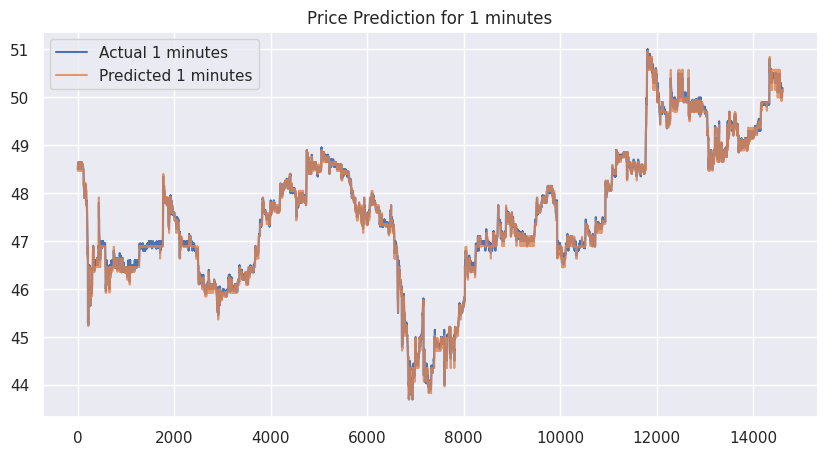

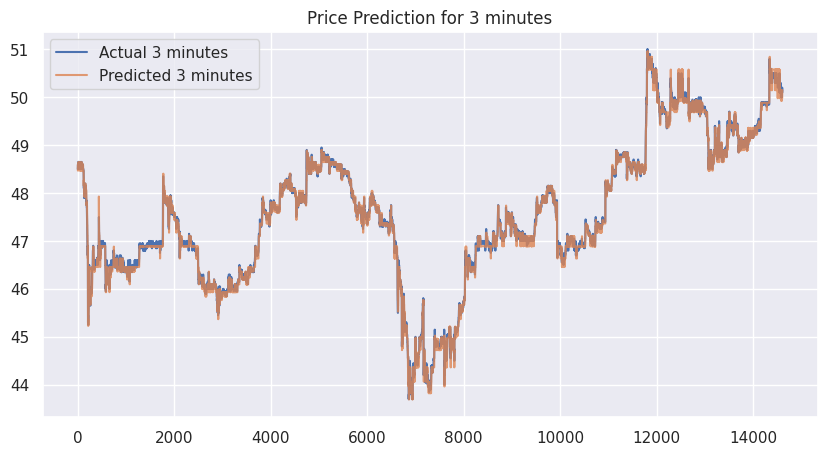

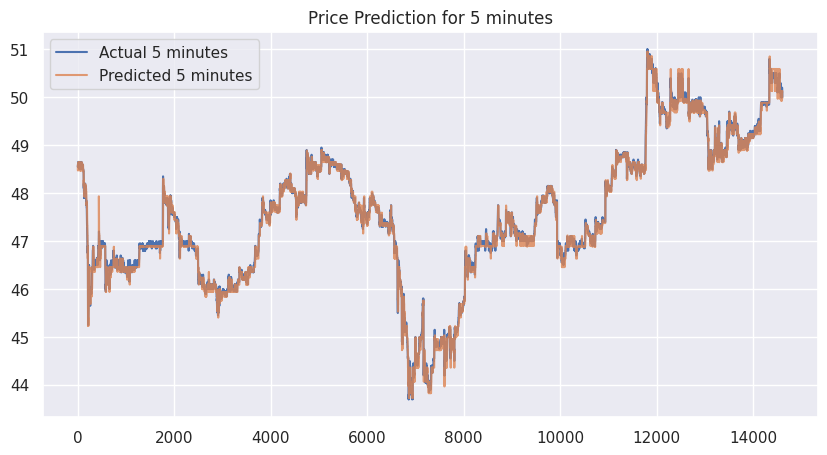

In [ ]:
# So sánh giá trị thực tế và dự đoán
for i, minutes in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(y_valid[:, i], label=f"Actual {minutes} minutes")
    plt.plot(y_pred_xgb[:, i], label=f"Predicted {minutes} minutes",alpha = 0.8)
    plt.legend()
    plt.title(f"Price Prediction for {minutes} minutes")
    plt.show()

Dự đoán trong 1 phút
- Dự đoán xu hướng tăng giảm đúng:  3014
- Dự đoán sai xu hướng:  11596


<Figure size 1000x500 with 0 Axes>

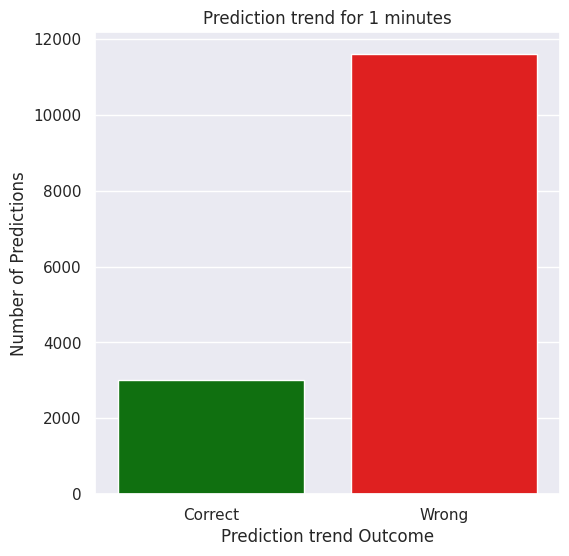

------------------------------
Dự đoán trong 3 phút
- Dự đoán xu hướng tăng giảm đúng:  4214
- Dự đoán sai xu hướng:  10396


<Figure size 1000x500 with 0 Axes>

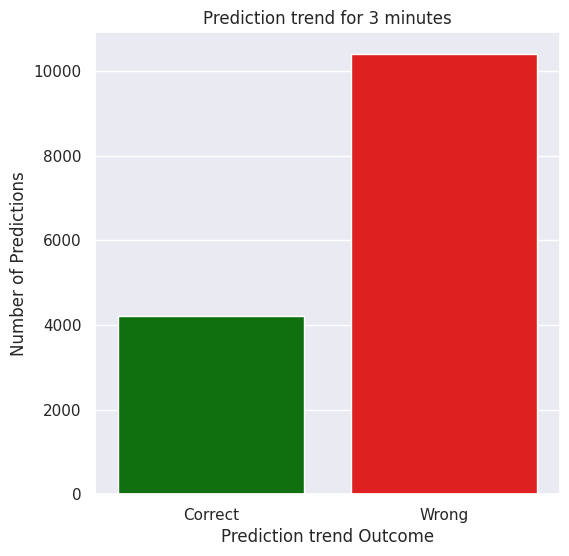

------------------------------
Dự đoán trong 5 phút
- Dự đoán xu hướng tăng giảm đúng:  4687
- Dự đoán sai xu hướng:  9923


<Figure size 1000x500 with 0 Axes>

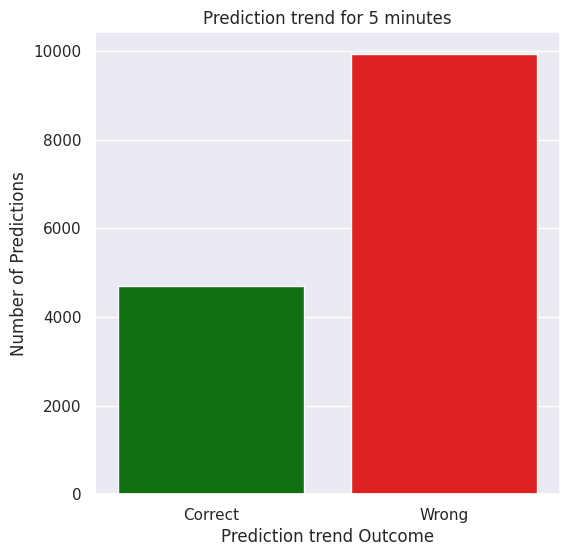

------------------------------


In [ ]:
for i, minutes in enumerate([1, 3, 5]):
  plt.figure(figsize=(10, 5))
  t = y_pred_xgb[:,i] - df_fpt['Close'].iloc[train_size:train_size+valid_size]
  t1 = df_fpt[f"Price Fluctuations {minutes} minutes"].iloc[train_size:train_size+valid_size]

  pred_correct = 0
  pred_wrong = 0

  # Iterate through both series simultaneously using zip
  for x, y in zip(t1, t):
    if((x > 0 and y > 0) or (x < 0 and y < 0) or (x == 0 and y == 0) ):
      pred_correct += 1
    else:
      pred_wrong += 1
  print(f"Dự đoán trong {minutes} phút")
  print("- Dự đoán xu hướng tăng giảm đúng: ", pred_correct)
  print("- Dự đoán sai xu hướng: ",pred_wrong)

  # Create DataFrame for seaborn
  data = {'Outcome': ['Correct', 'Wrong'], 'Count': [pred_correct, pred_wrong]}
  df = pd.DataFrame(data)

  fig, ax = plt.subplots(figsize=(6, 6))  # Create figure and axes
  sns.barplot(x='Outcome', y='Count', hue='Outcome', data=df, palette=['green', 'red'], legend=False, dodge=False, ax=ax)
  ax.set_title(f"Prediction trend for {minutes} minutes")  # Set title using ax
  ax.set_ylabel("Number of Predictions")  # Set ylabel using ax
  ax.set_xlabel("Prediction trend Outcome")  # Set xlabel using ax
  plt.show()
  print("-"*30)

##### Tập test

In [ ]:
# Dự đoán trên tập kiểm định
y_pred_xgb_test = model_xgb.predict(X_test.reshape(X_test.shape[0], -1))

# Đánh giá mô hình bằng MSE
mse_xgb = mean_squared_error(y_test, y_pred_xgb_test)
print(f"XGBoost MSE: {mse_xgb}")

XGBoost MSE: 6.611829756136877


In [ ]:
from sklearn.metrics import r2_score
# Tính R2 cho từng cột (1, 3, 5 phút)
r2_1min = r2_score(y_test[:, 0], y_pred_xgb_test[:, 0])
r2_3min = r2_score(y_test[:, 1], y_pred_xgb_test[:, 1])
r2_5min = r2_score(y_test[:, 2], y_pred_xgb_test[:, 2])

# In kết quả
print(f"R2 score for 1 minute prediction: {r2_1min}")
print(f"R2 score for 3 minute prediction: {r2_3min}")
print(f"R2 score for 5 minute prediction: {r2_5min}")

R2 score for 1 minute prediction: -0.1820863856549635
R2 score for 3 minute prediction: -0.18504729205775927
R2 score for 5 minute prediction: -0.18387076748704567


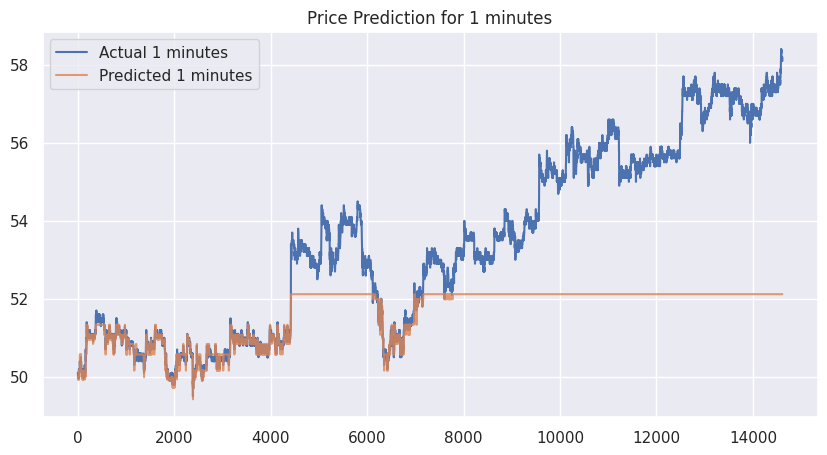

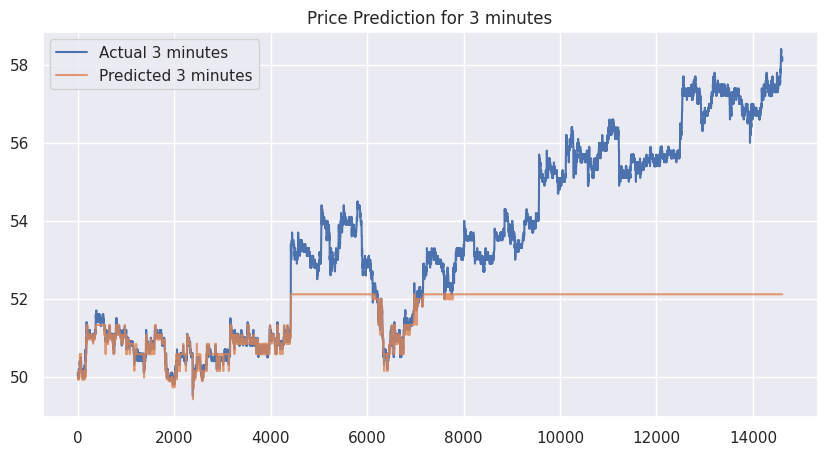

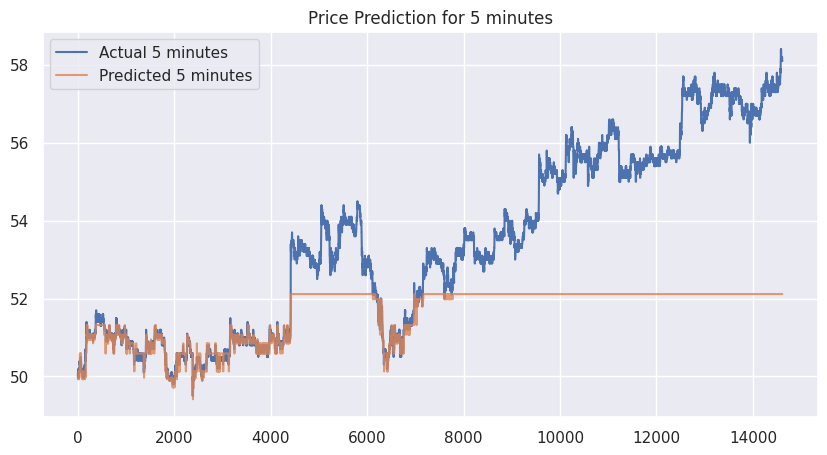

In [ ]:
# So sánh giá trị thực tế và dự đoán
for i, minutes in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:, i], label=f"Actual {minutes} minutes")
    plt.plot(y_pred_xgb_test[:, i], label=f"Predicted {minutes} minutes",alpha = 0.8)
    plt.legend()
    plt.title(f"Price Prediction for {minutes} minutes")
    plt.show()

Dự đoán trong 1 phút
- Dự đoán xu hướng tăng giảm đúng:  2691
- Dự đoán sai xu hướng:  11921


<Figure size 1000x500 with 0 Axes>

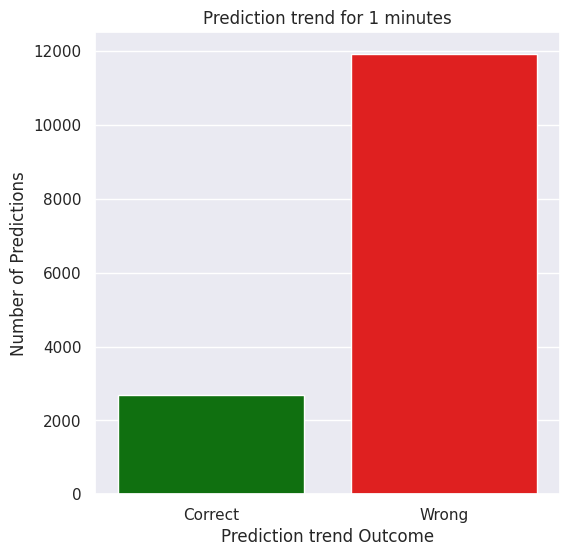

------------------------------
Dự đoán trong 3 phút
- Dự đoán xu hướng tăng giảm đúng:  3774
- Dự đoán sai xu hướng:  10838


<Figure size 1000x500 with 0 Axes>

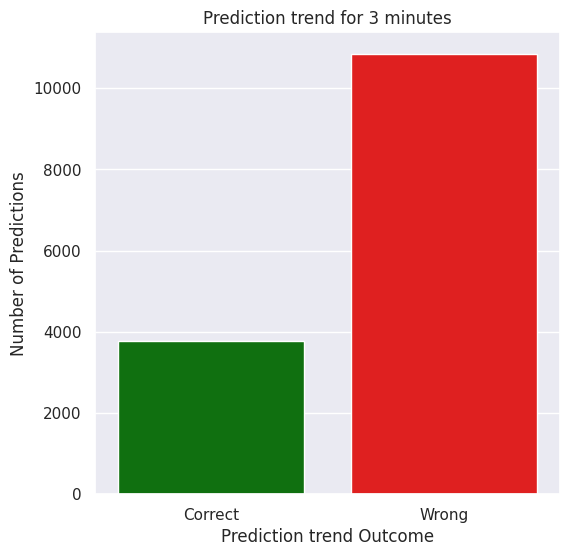

------------------------------
Dự đoán trong 5 phút
- Dự đoán xu hướng tăng giảm đúng:  4303
- Dự đoán sai xu hướng:  10309


<Figure size 1000x500 with 0 Axes>

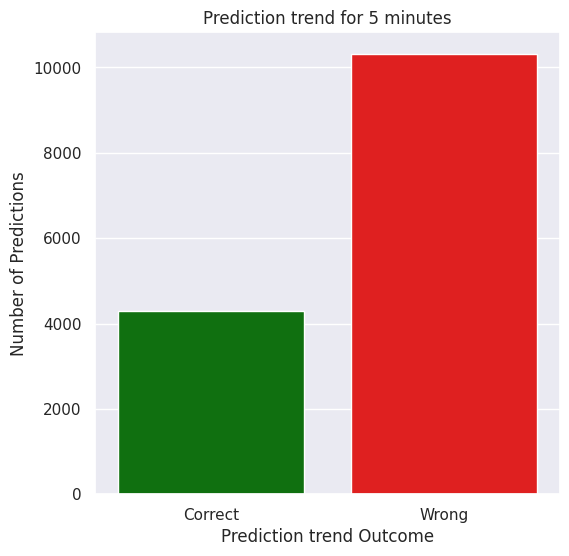

------------------------------


In [ ]:
for i, minutes in enumerate([1, 3, 5]):
  plt.figure(figsize=(10, 5))
  t = y_pred_xgb_test[:,i] - df_fpt['Close'].iloc[train_size+valid_size:]
  t1 = df_fpt[f"Price Fluctuations {minutes} minutes"].iloc[train_size+valid_size:]

  pred_correct = 0
  pred_wrong = 0

  # Iterate through both series simultaneously using zip
  for x, y in zip(t1, t):
    if((x > 0 and y > 0) or (x < 0 and y < 0) or (x == 0 and y == 0) ):
      pred_correct += 1
    else:
      pred_wrong += 1
  print(f"Dự đoán trong {minutes} phút")
  print("- Dự đoán xu hướng tăng giảm đúng: ", pred_correct)
  print("- Dự đoán sai xu hướng: ",pred_wrong)

  # Create DataFrame for seaborn
  data = {'Outcome': ['Correct', 'Wrong'], 'Count': [pred_correct, pred_wrong]}
  df = pd.DataFrame(data)

  fig, ax = plt.subplots(figsize=(6, 6))  # Create figure and axes
  sns.barplot(x='Outcome', y='Count', hue='Outcome', data=df, palette=['green', 'red'], legend=False, dodge=False, ax=ax)
  ax.set_title(f"Prediction trend for {minutes} minutes")  # Set title using ax
  ax.set_ylabel("Number of Predictions")  # Set ylabel using ax
  ax.set_xlabel("Prediction trend Outcome")  # Set xlabel using ax
  plt.show()
  print("-"*30)


## Summary

Nhìn chung 2 mô hình đều đưa ra dự đoán khá tốt theo thời gian trên tập `valid`, tuy nhiên có 1 số khác biệt như sau:

`LSTM` hoạt động tốt hơn `XGB` khi đưa ra dự đoán về giá trên tập `test`, ta thấy biểu đồ của `LSTM` sát với tập đánh giá hơn `XGB`, tuy nhiên `XGB` lại đưa ra dự đoán về xu hướng có phần nhĩnh hơn `LSTM`.

> Kết luận:
* Cần dự đoán giá dùng LSTM
* Cần dự đoán xu hướng giá (tăng/ giảm) dùng XGB